In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [42]:
#Used to display points and centroids after the KMeans process is complete
def display(X,centroids,idx):
    K = centroids.shape[0]
    m = X.shape[0]

    fig , ax = fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,10))
    color = "rgbky"
    for i in range(K):
        index_i_centroid = (idx == i).reshape(m,1)
        ax.scatter(X[index_i_centroid[:,0],0],X[index_i_centroid[:,0],1],c = color[i%5],s=40)



#    plt.scatter(X[:,0],X[:,1])
    plt.scatter(centroids[:,0],centroids[:,1],c = "m",s = 120)
    plt.tight_layout()

In [43]:

import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients t

(360, 360, 3)


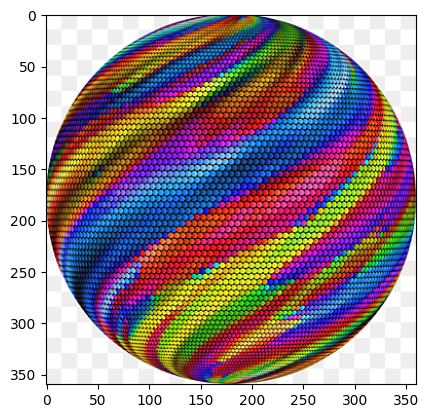

In [44]:
isPNG = False
Tk().withdraw()
filename = 'esfera.png'
image = imread(filename)
name = filename.split(".")
if name[1] == "png":
    isPNG = True
print(image.shape)
plt.imshow(image)


In [45]:
A = image.reshape(image.shape[0]*image.shape[1],image.shape[2])
print(A.shape)
A

(129600, 3)


array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [46]:
if isPNG:
    A
else:
    A = A / 255

In [47]:

from sklearn.cluster import KMeans

print(A) #Normalized
K = 4
X = A
kmeans = KMeans(n_clusters=K, random_state = 22)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

idx = y_kmeans
centroids = kmeans.cluster_centers_

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 ...
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


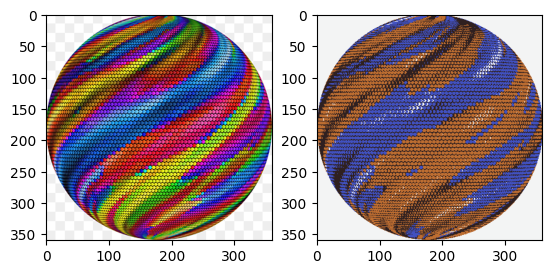

In [48]:
X_recovered = X.copy()
for i in range(K):
    X_recovered[(np.squeeze((idx == i))),:] = centroids[i]

X_recovered = X_recovered.reshape(image.shape[0],image.shape[1],image.shape[2])
A = A.reshape(image.shape[0],image.shape[1],image.shape[2])

fig , axs = plt.subplots(1,2)

axs[0].imshow(A)
axs[1].imshow(X_recovered)
plt.imsave("kmeans_esfera.png",X_recovered)